In [ ]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

In [ ]:
# brent_df=pd.read_csv('BZ.csv') # Read Excel
#brent_df.describe()

# #Date,Close,Volume,Open,High,Low
nike_df.columns=['Date','Open', 'High', 'Low', 'Close','Adj Close','Volume', 'Price']
nike_df.set_index('Date');
nike_df['Date']=brent_df["Date"].astype('datetime64[ns]')
nike_df.head()

NameError: ignored

In [ ]:
plt.figure(figsize=(16,8))
plt.title('Stocks Close Price History')
plt.plot(nike_df['Close'])
plt.plot(nike_df['Price'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD($)', fontsize=18)
plt.legend(['Brent Oil'], loc='lower right')
plt.legend(['Nike stock'], loc='lower right')

In [ ]:
# create array for brent oil with only price
nike_prices = nike_df.filter(['Close']).values
training_data_len = math.ceil(len(nike_prices) * 0.8) # total len 2536 but we only want 80% of the total data to train
training_data_len

# aapl_prices = aapl_df.filter(['Close']).values
# aapl_training_data_len = math.ceil(len(aapl_prices) * 0.8) # total len 2536 but we only want 80% of the total data to train
# aapl_training_data_len # 2014

6726

In [ ]:
# # scale the data -- good practice and helps model
# scaler = MinMaxScaler(feature_range=(0,1))
# scaled_data = scaler.fit_transform(brent_prices) # computes min and max values for scaling 
# scaled_data.shape

# # scale the data -- good practice and helps model
# aapl_scaler = MinMaxScaler(feature_range=(0,1))
# aapl_scaled_data = scaler.fit_transform(aapl_prices) # computes min and max values for scaling 
# aapl_scaled_data

In [ ]:
# aapl_df=pd.read_csv('AAPL.csv') # Read Excel
# # aapl_df.describe()

# # #Date,Close,Volume,Open,High,Low
# aapl_df.columns=['Date','Open','High','Low','Close','Adj Close', 'Volume']
# aapl_df.set_index('Date');
# aapl_df['Date']=aapl_df["Date"].astype('datetime64[ns]')
# aapl_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-04-07,35.932499,36.044998,35.817501,35.834999,33.833973,66688800
1,2017-04-10,35.900002,35.970001,35.724998,35.792500,33.793839,75733600
2,2017-04-11,35.735001,35.837502,35.014999,35.407501,33.430340,121517600
3,2017-04-12,35.400002,35.537498,35.252499,35.450001,33.470470,81400000
4,2017-04-13,35.477501,35.595001,35.262501,35.262501,33.293442,71291600


In [ ]:
# aapl_prices = aapl_df.filter(['Close']).values
# scaler2 = MinMaxScaler(feature_range=(0,1))
# scaled_data2 = scaler2.fit_transform(aapl_prices) # computes min and max values for scaling 
# scaled_data2.shape

(1259, 1)

In [ ]:
# # create training dataset
# # create the scaled training data set
train_data = training_data_len[0:training_data_len, :]# contains all scaled date up to length of trained data (80% of original file)
#split the data into x_train and y_train data set
x_train = [] # training features
y_train = [] # dependent target variables

# for i in range(60, len(train_data)): # 
#   x_train.append(train_data[i-60:i, 0]) # 60 value - we want to predict based off first 60 values....in the 80%dataseet
#   y_train.append(train_data[i, 0]) #61 value
#   if i <=60:# change this to 61 for another test see the x_train to see 2 arrays
#     print(x_train)
#     print(y_train)
#     print()

In [ ]:
# x_train, y_train = np.array(x_train), np.array(y_train)

# # reshape the data cause LSTM needs 3 dimensional values
# x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

(948, 60, 1)

In [ ]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))# Dense layer 25 neurons
model.add(Dense(1))

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')# optimizer used to improve the loss function

In [ ]:
model.fit(x_train, y_train, batch_size=1, epochs=1) # epoch is the number of iterations

948/948 [==============================] - 30s 31ms/step - loss: 7.0938e-04


In [ ]:
# Create the testing data set
# Create a new array containing scaled values from index 1969 to 2029 (training_data_len = 2029)
test_data = scaled_data[training_data_len - 60: , :]# last 60 prices from the 80% test data
# create the data sets x_test and y_test
x_test = []
y_test = brent_prices[training_data_len:, :] # this should be all values we want our model to predict..it is the remaining 20% prices 
for i in range (60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])


In [ ]:
# convert the data to nump array
x_test = np.array(x_test)

# reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1)) # reshape to give it a new col last one is number of features we have

In [ ]:
# get the models predicted price values
predictions = model.predict(x_test) # want it to be the same values in our y_test dataset once we transform this data
predictions = scaler.inverse_transform(predictions) # unscaling the values 

In [ ]:
# evaluate our model get the root mean squared error (RMSE). How Good are model performs can use other evaluations too
# rmse = np.sqrt(np.mean(predictions - y_test)**2) # power of 2
# rmse

In [ ]:
# plot the data
brent_prices_data = brent_df.filter(['Close'])
train = brent_prices_data[:training_data_len]
valid = brent_prices_data[training_data_len:]
valid['Predictions'] = predictions # add a new col called predictions
# shot the valid and predicted prices why are my predictions so messed up?
valid 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Close,Predictions
1008,62.95,65.361580
1009,63.28,65.249542
1010,63.67,65.200607
1011,66.58,65.236778
1012,66.94,65.703918
...,...,...
1255,107.91,114.124825
1256,104.39,112.930954
1257,107.53,111.230873
1258,106.64,110.076752


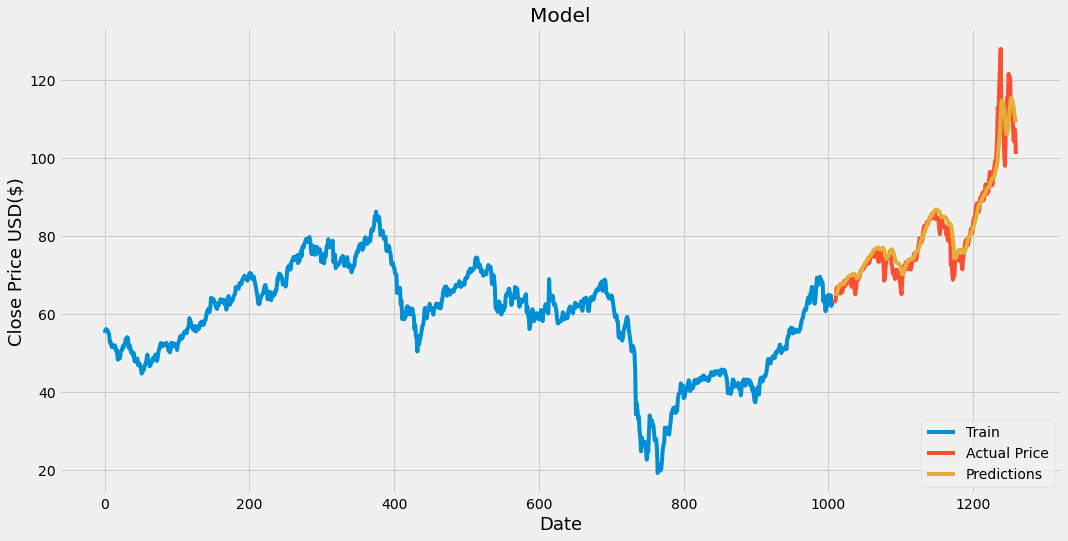

In [ ]:
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD($)', fontsize=18)
plt.plot(train['Close']) # give it data
plt.plot(valid[['Close', 'Predictions']])

plt.legend(['Train', 'Actual Price', 'Predictions'], loc='lower right')